In [1]:
%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

## A look at CA energy data
In California, energy and environmental policy initiatives are driving electric grid changes. Key initiatives
include the following:
<li>33 percent of retail electricity from renewable power by 2020, and 50% renewable by 2030; <li>greenhouse gas emissions reduction goal to 1990 levels by 2020;<li>regulations in the next 4-9 years requiring power plants that use coastal water for cooling to either repower, retrofit or retire; <li>policies to increase distributed generation; and <li>an executive order for 1.5 million zero emission vehicles by 2025.

These initiatives are great, but can provide some real challenges when it comes to implementation. Why?
1. For the grid to function correctly, the energy supplied must exactly equal the energy demand at all times. If energy generation does not equal demand, the grid can have failures and blackouts. 
2. Over generation is as bad as under generation. 
3. The grid does not deal well with large/rapid fluctuations in energy usage

Accurate predictions of demand and prediction of generation from renewable sources is crucial to stabilizing the grid. We have provided data on hourly energy demand for the state of California as well as solar and wind energy generation for the state for the month of March 2016. In this minilab we will explore the energy datasets and will explore some of the challenges with reaching the initiatives.


In [2]:
ca_energy_demand = Table.read_table('data/March2016_CA_energy_demand.csv')
solar = Table.read_table('data/March2016_CA_gen_solar.csv')
wind = Table.read_table('data/March2016_CA_gen_wind.csv')

## Part 1 - visualizing a week of data
**Tasks:**
<li> Plot energy demand ('MW') vs. 'INDEX' for the first week of March (hint you can use tables.take() to take only certain rows) <li> Plot solar energy generation ('MW') vs. 'INDEX' for the first week of March  <li> Plot wind energy generation ('MW') vs. 'INDEX' for the first week of March

**Questions:** 
<li> What's the min/max energy used per hour in this week? <li> Is more energy used on weekends or weekdays? <li> What's the min/max solar energy produced per hour in this week? <li> Which day appears to be least sunny? What's the max solar energy produced on this day? <li> What's the min/max wind energy produced per hour in this week? <li> How would you describe the wind energy trend over the week?

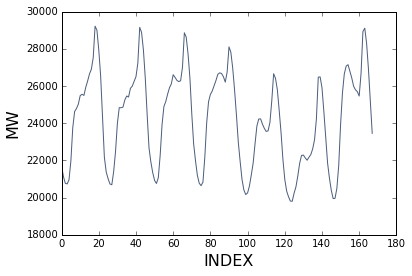

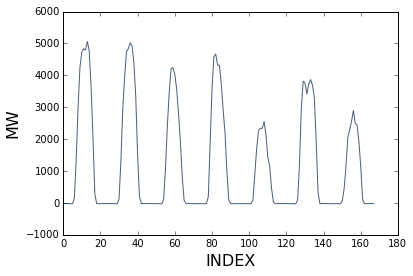

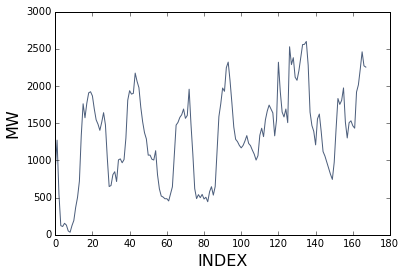

In [3]:
# Your code here

#Answer key
ca_energy_demand.take(range(24*7)).plot('INDEX', 'MW')
solar.take(range(24*7)).plot('INDEX', 'MW')
wind.take(range(24*7)).plot('INDEX', 'MW')


In [4]:
# Answer questions here!

## Plot mean hourly solar and wind energy generation and mean hourly energy demand
**Tasks**<li> For each of solar, wind, and ca_energy_demand, **group** by hour and save the average energy consumption/generation per hour (np.mean). Save the results as solar_avg_byhour, wind_avg_by_hour, and demand_avg_byhour. <li> Plot the average energy wind generation, solar generation, and consumption vs. hour for the month of March. 

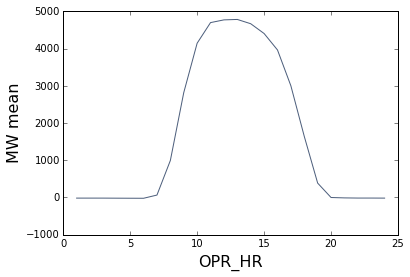

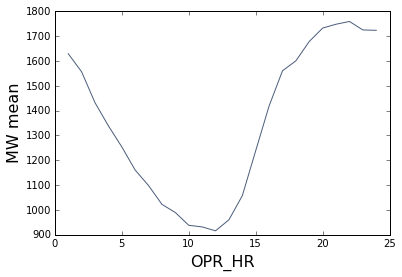

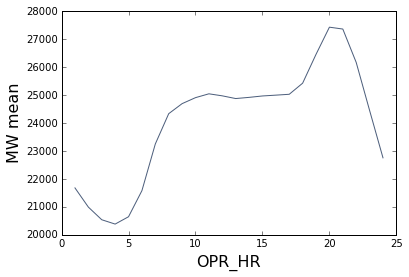

In [5]:
#Your code here


#Answer key
solar_avg_byhour = solar.group('OPR_HR',np.mean)
solar_avg_byhour.plot('OPR_HR', 'MW mean')

wind_avg_byhour = wind.group('OPR_HR',np.mean)
wind_avg_byhour.plot('OPR_HR', 'MW mean')

demand_avg_byhour = ca_energy_demand.group('OPR_HR',np.mean)
demand_avg_byhour.plot('OPR_HR', 'MW mean')


## Plot the standard deviation of hourly energy generation and hourly energy demand

**Tasks** <li> Again group by hour, but now save the standard deviation MW. Save results as solar_std_byhour, wind_std_byhour, and demand_std_byhour. <li> Plot the standard deviation of wind generation, solar generation, and consumption vs. hour for the month of March. <li> **Question:** Which source - wind or solar, has more variation?


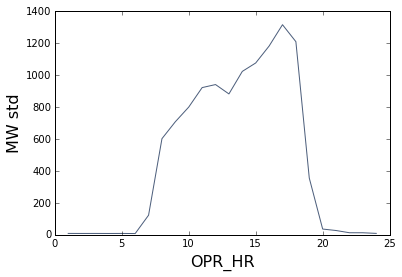

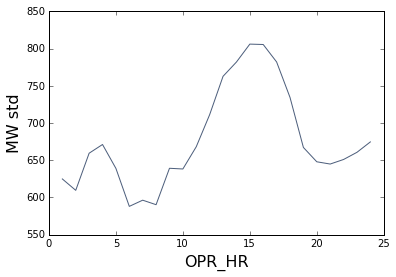

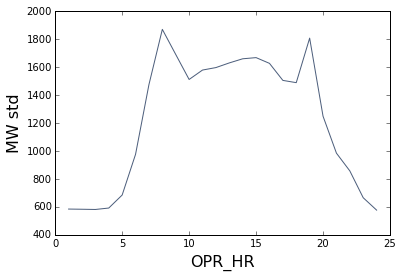

In [6]:
# Your code here

# Answer key
solar_std_byhour = solar.group('OPR_HR',np.std)
solar_std_byhour.plot('OPR_HR', 'MW std')

wind_std_byhour = wind.group('OPR_HR',np.std)
wind_std_byhour.plot('OPR_HR', 'MW std')

demand_std_byhour = ca_energy_demand.group('OPR_HR',np.std)
demand_std_byhour.plot('OPR_HR', 'MW std')

## Mean +/- standard deviation
**Task**
1. Plot mean +/- standard devation per hour. (note you will have to use plt.plot to plot both + std and - std in the same graph). Plot solar, wind, and demand each in their own window. Use plt.figure() to creates a new plot window. 

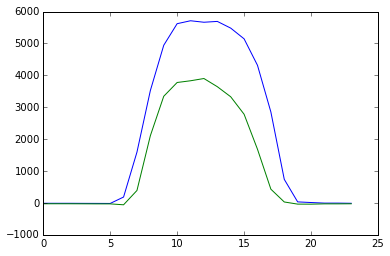

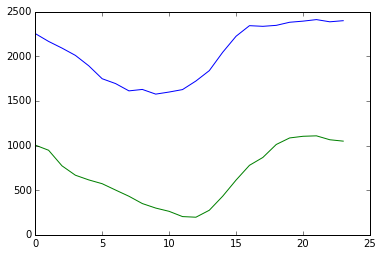

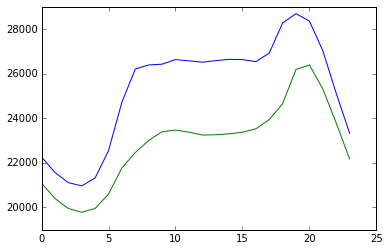

In [7]:
# Your code here

#Answer key
plt.plot(solar_avg_byhour['MW mean']+solar_std_byhour['MW std'])
plt.plot(solar_avg_byhour['MW mean']-solar_std_byhour['MW std'])

plt.figure()
plt.plot(wind_avg_byhour['MW mean']+wind_std_byhour['MW std'])
plt.plot(wind_avg_byhour['MW mean']-wind_std_byhour['MW std'])

plt.figure()
plt.plot(demand_avg_byhour['MW mean']+demand_std_byhour['MW std'])
plt.plot(demand_avg_byhour['MW mean']-demand_std_byhour['MW std'])

## CA energy goals
As mentioned above, CA has a goal of producing 33% renewables by 2030.
**Questions:** 
<li> How are we doing on this goal - how much of our grid's energy came from renewable sources for March 2016?<li> What percentage of renewables comes from wind? what percentage from solar?

In [8]:
# your code/answer here

#Answer key
(solar['MW'].sum()+wind['MW'].sum())/ca_energy_demand['MW'].sum()
#0.1257 = percent renewable
solar['MW'].sum()/(solar['MW'].sum()+wind['MW'].sum()), wind['MW'].sum()/(solar['MW'].sum()+wind['MW'].sum())

(0.55317639439591226, 0.44682360560408785)

## Energy from non-renewable sources:
**Tasks**<li> Add a column to demand_avg_by_hour called 'non-renewable MW' that contains the average hourly MW that is not satisfied by renewables. <li> Plot the average non-renewable energy requirement vs. hour. 

**Questions** <li> Brifly describe the trend - what hour is the peak, what hour is the minimum, is it relatively flat? <li> Given that the grid does not handle large/rapid fluctuations in energy, do you think reaching the 2020 energy predictions might be problematic? Explain.

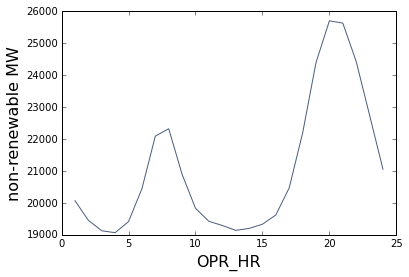

In [9]:
# Your code here

# Answer key
demand_avg_byhour['non-renewable MW']=demand_avg_byhour['MW mean']-solar_avg_byhour['MW mean']-wind_avg_byhour['MW mean']
demand_avg_byhour.plot('OPR_HR','non-renewable MW')

In [10]:
# Answer questions here.